# Семинар №10. Кластеризация

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
np.random.seed(123)
X1 = np.random.randn(100, 2)
X2 = np.random.randn(100, 2) - np.array([10, 1])
X3 = np.random.randn(100, 2) - np.array([1, 10])
X = np.vstack((X1, X2, X3))
y = np.array([1] * 100 + [2] * 100 + [3] * 100)

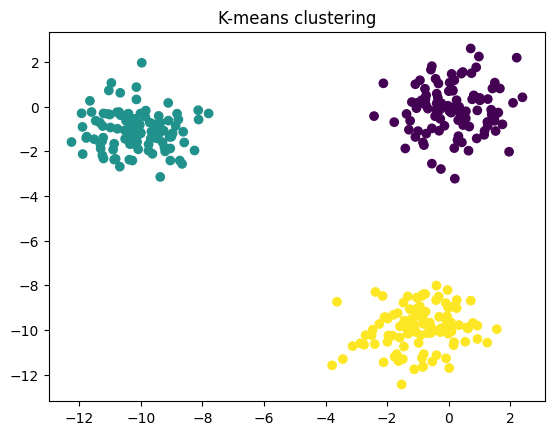

In [3]:
k_means = KMeans(n_clusters=3)
k_means = k_means.fit(X)
clusters = k_means.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.title("K-means clustering")
plt.show()

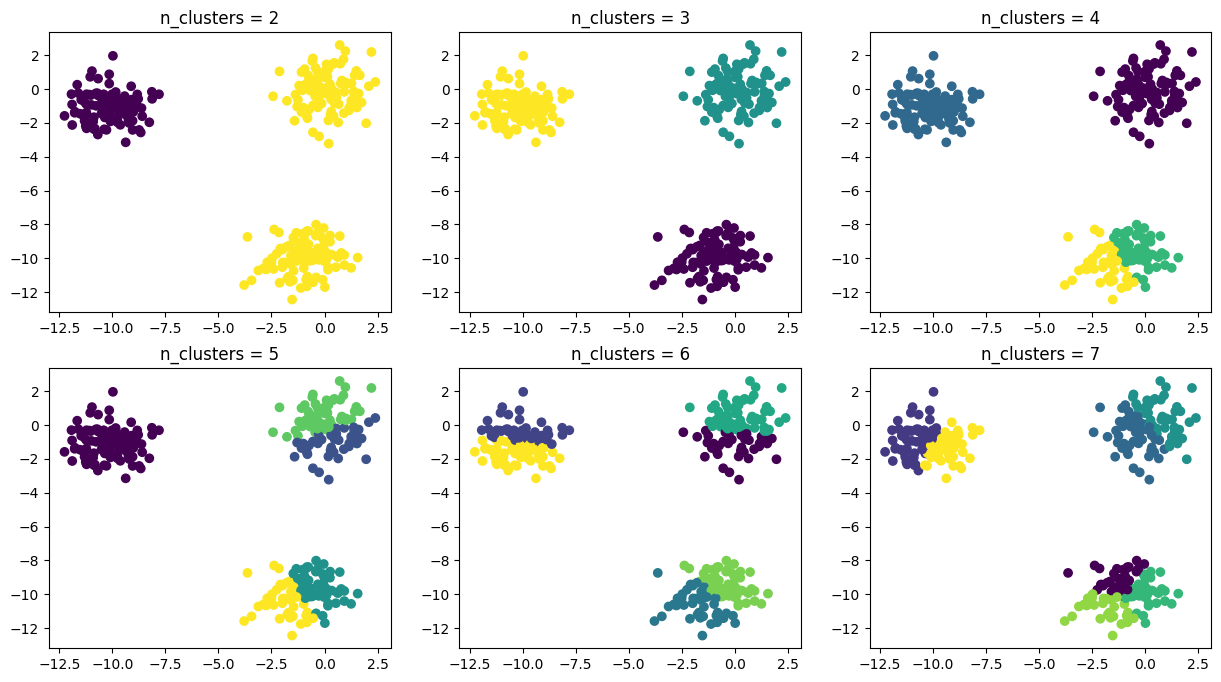

In [4]:
plt.figure(figsize=(15, 8))
for n_c in range(2, 8):
    k_means = KMeans(n_clusters=n_c)
    k_means = k_means.fit(X)
    clusters = k_means.predict(X)
    plt.subplot(2, 3, n_c - 1)
    plt.scatter(X[:, 0], X[:, 1], c=clusters)
    plt.title("n_clusters = {}".format(n_c))

plt.show()

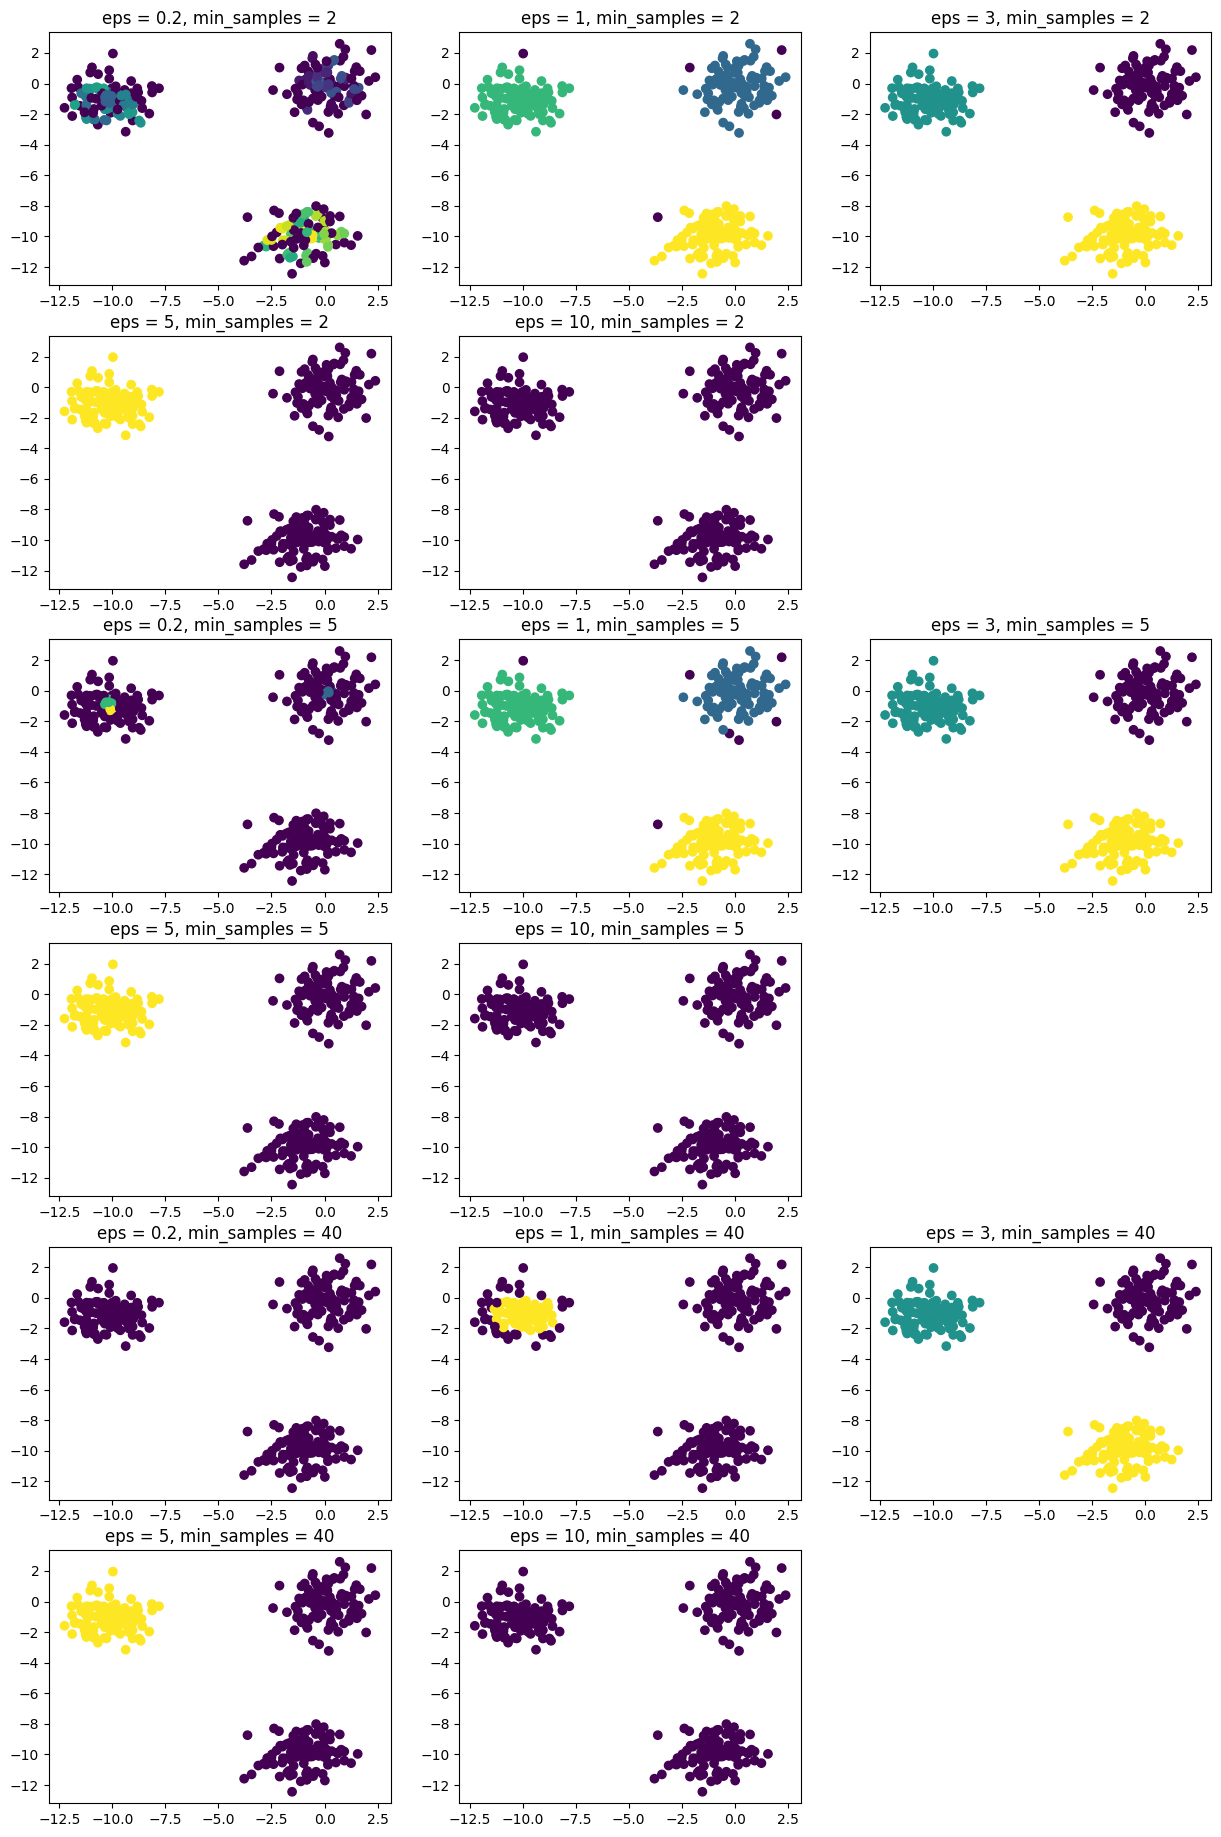

In [5]:
from sklearn.cluster import DBSCAN

plt.figure(figsize=(15, 23))
i = 1
for samples in [2, 5, 40]:
    for e in [0.2, 1, 3, 5, 10]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        plt.subplot(6, 3, i)
        plt.scatter(X[:, 0], X[:, 1], c=clusters)
        plt.title("eps = {}, min_samples = {}".format(e, samples))
        i += 1
    i += 1

plt.show()

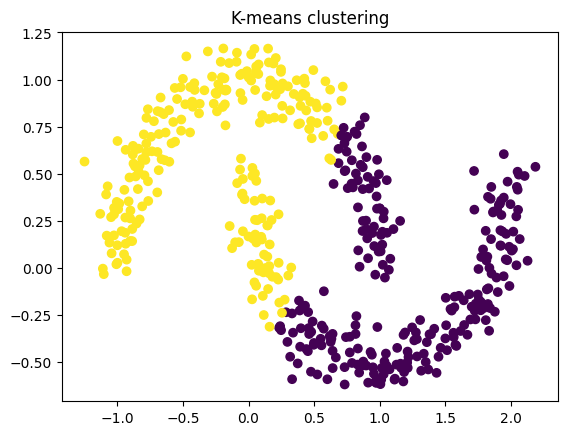

In [6]:
from sklearn.datasets import make_circles, make_moons

X, y = make_moons(n_samples=500, noise=0.1)
k_means = KMeans(n_clusters=2)
k_means = k_means.fit(X)
clusters = k_means.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.title("K-means clustering")
plt.show()

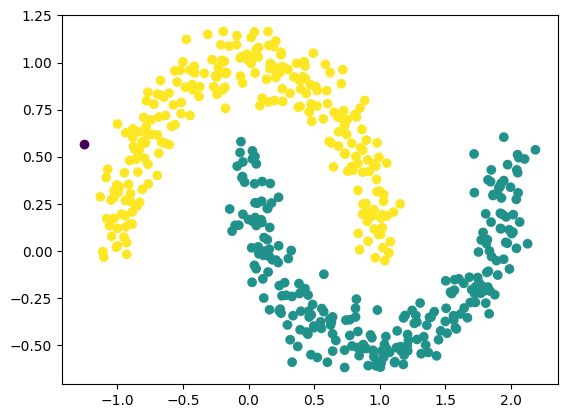

In [7]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.show()

In [8]:
centers_idx = np.random.choice(X.shape[0], size=3, replace=False)
centers = X[centers_idx]
centers.shape

(3, 2)

In [9]:
distances = np.array([np.sqrt(((X - center) ** 2).sum(axis=1)) for center in centers]).T
min_distances = np.argmin(distances, axis=1)

In [12]:
np.random.seed(123)
X1 = np.random.randn(100, 2)
X2 = np.random.randn(100, 2) - np.array([10, 1])
X3 = np.random.randn(100, 2) - np.array([1, 10])
X = np.vstack((X1, X2, X3))
y = np.array([1] * 100 + [2] * 100 + [3] * 100)

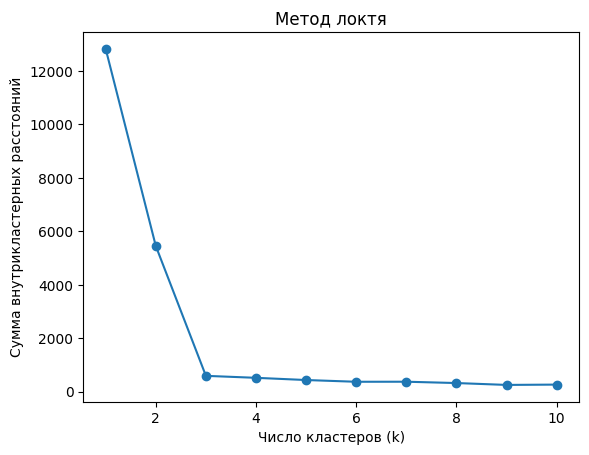

In [13]:
### Смотрим метод локтя
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Строим график
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Метод локтя")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Сумма внутрикластерных расстояний")
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

In [16]:
sils = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    sils.append(silhouette_score(X, kmeans.fit_predict(X)))


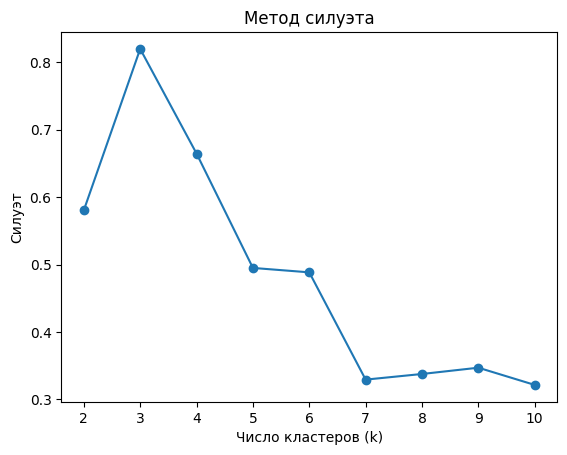

In [18]:
# Строим график
plt.plot(range(2, 11), sils, marker='o')
plt.title("Метод силуэта")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Силуэт")
plt.show()

## Реализация K-MEANS

In [10]:
class MyKMeans:
    def __init__(self, k: int = 3, max_iter: int = 100):
        self.k = k
        self.max_iter = max_iter

    def euclidian_distance(self, a, b):
        return np.sqrt(((a - b) ** 2).sum(axis=1))

    def fit(self, X_train):
        X_train = np.array(X_train)
        centers_idx = np.random.choice(X_train.shape[0], size=self.k, replace=False)
        self.centers = X_train[centers_idx]

        for i in range(self.max_iter):
            distances = np.array([self.euclidian_distance(X_train, center) for center in self.centers]).T
            min_distances = np.argmin(distances, axis=1)
            for cluster in range(self.k):
                current_cluster = X_train[min_distances == cluster]
                new_center = current_cluster.mean(axis=0)
                self.centers[cluster] = new_center

    def predict(self, X_test):
        X_test = np.array(X_test)

        distances = np.array([self.euclidian_distance(X_test, center) for center in self.centers]).T
        min_distances = np.argmin(distances, axis=1)
        return min_distances

In [11]:
np.random.seed(123)
X1 = np.random.randn(100, 2)
X2 = np.random.randn(100, 2) - np.array([10, 1])
X3 = np.random.randn(100, 2) - np.array([1, 10])
X = np.vstack((X1, X2, X3))
y = np.array([1] * 100 + [2] * 100 + [3] * 100)

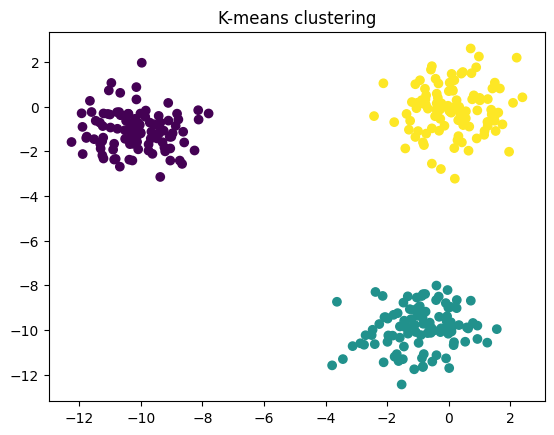

In [12]:
my_kmeans = MyKMeans()
my_kmeans.fit(X)
clusters = my_kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.title("K-means clustering")
plt.show()

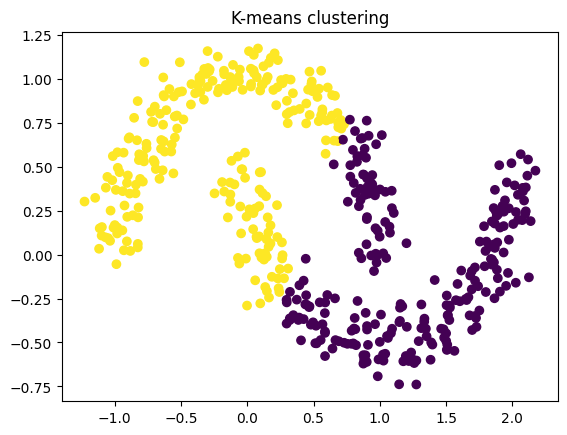

In [13]:
X, y = make_moons(n_samples=500, noise=0.1)
my_kmeans = MyKMeans(k=2)
my_kmeans.fit(X)
clusters = my_kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.title("K-means clustering")
plt.show()